In [4]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [5]:
! kaggle datasets download -d gpiosenka/butterfly-images40-species

 99% 835M/842M [00:05<00:00, 148MB/s]
100% 842M/842M [00:06<00:00, 147MB/s]


In [6]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [7]:
! unzip butterfly-images40-species.zip

Streaming output truncated to the last 5000 lines.
  inflating: butterflies_rev2/train/an 88/05.jpg  
  inflating: butterflies_rev2/train/an 88/06.jpg  
  inflating: butterflies_rev2/train/an 88/07.jpg  
  inflating: butterflies_rev2/train/an 88/08.jpg  
  inflating: butterflies_rev2/train/an 88/09.jpg  
  inflating: butterflies_rev2/train/an 88/10.jpg  
  inflating: butterflies_rev2/train/an 88/11.jpg  
  inflating: butterflies_rev2/train/an 88/12.jpg  
  inflating: butterflies_rev2/train/an 88/13.jpg  
  inflating: butterflies_rev2/train/an 88/14.jpg  
  inflating: butterflies_rev2/train/an 88/15.jpg  
  inflating: butterflies_rev2/train/an 88/16.jpg  
  inflating: butterflies_rev2/train/an 88/17.jpg  
  inflating: butterflies_rev2/train/an 88/18.jpg  
  inflating: butterflies_rev2/train/an 88/19.jpg  
  inflating: butterflies_rev2/train/an 88/20.jpg  
  inflating: butterflies_rev2/train/an 88/21.jpg  
  inflating: butterflies_rev2/train/an 88/22.jpg  
  inflating: butterflies_rev2/t

In [13]:
train_path='/content/butterflies/train'
categories=os.listdir(train_path)
print(categories)

['pipevine swallow', 'sixspot burnet', 'sootywing', 'wood satyr', 'two barred flasher', 'mangrove skipper', 'clouded sulphur', 'cabbage white', 'crecent', 'scarce swallow', 'crimson patch', 'silver spot skipper', 'purple hairstreak', 'copper tail', 'painted lady', 'ulyses', 'banded peacock', 'an 88', 'zebra long wing', 'adonis', 'indra swallow', 'skipper', 'viceroy', 'clodius parnassian', 'red admiral', 'american snoot', 'beckers white', 'southern dogface', 'grey hairstreak', 'peacock', 'straited queen', 'eastern coma', 'paper kite', 'chestnut', 'great eggfly', 'orange tip', 'monarch', 'malachite', 'metalmark', 'pine white', 'orange oakleaf', 'yellow swallow tail', 'gold banded', 'orchard swallow', 'question mark', 'large marble', 'red spotted purple', 'black hairstreak', 'morning cloak', 'julia']


In [12]:
len(categories)

50

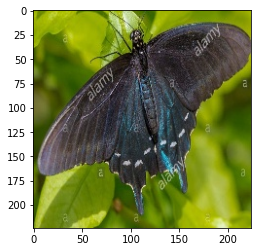

In [14]:
import cv2
for category in categories:
  path=os.path.join(train_path,category)
  class_label=categories.index(category)
  for img in os.listdir(path):
    img_array=cv2.imread(os.path.join(path,img))
    colored=cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
    plt.imshow(colored)
    break
  break  

In [26]:
training_data=[]
def create_training():
  for category in categories:
    path=os.path.join(train_path,category)
    class_label=categories.index(category)
    for img in os.listdir(path):
      img_array=cv2.imread(os.path.join(path,img))
      colored=cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
      training_data.append([colored,class_label])


In [34]:
create_training()
from random import shuffle
shuffle(training_data)

In [28]:
len(training_data)

4955

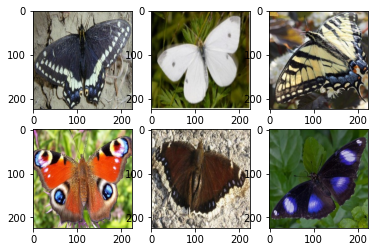

In [35]:
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(training_data[i][0])
plt.show()

In [36]:
import imgaug.augmenters as aug

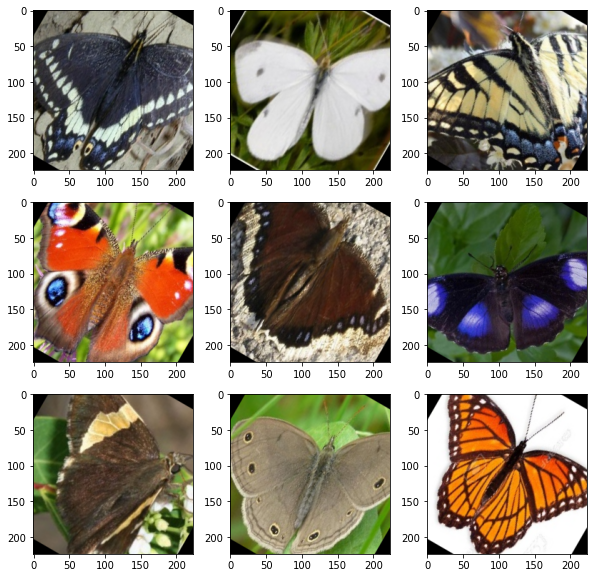

In [43]:
augmentedImg=aug.Affine(rotate=30,scale=1.2)
plt.figure(figsize=(10,8))
for i in range(9):
  plt.subplot(3,3,i+1)
  augImg=augmentedImg.augment_image(training_data[i][0])
  plt.imshow(augImg)
plt.show()